<a href="https://colab.research.google.com/github/Bahaakhalled/Tabular-Playground-Series---Sep-2022/blob/main/Tabular_Playground_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [369]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [370]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [371]:
my_file = Path("train.csv")
if my_file.is_file()==False:
  !wget 'https://raw.githubusercontent.com/Bahaakhalled/Tabular-Playground-Series---Sep-2022/main/train.csv'
  !wget 'https://raw.githubusercontent.com/Bahaakhalled/Tabular-Playground-Series---Sep-2022/main/test.csv'

In [372]:
tab=pd.read_csv('train.csv')
tab.head()

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [373]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65490 entries, 0 to 65489
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    65490 non-null  int64 
 1   date      65490 non-null  object
 2   country   65490 non-null  object
 3   store     65490 non-null  object
 4   product   65490 non-null  object
 5   num_sold  65490 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.0+ MB


In [374]:
tab.nunique()

row_id      65490
date         1365
country         6
store           2
product         4
num_sold      677
dtype: int64

In [375]:
ctab=tab.copy()

In [376]:
ctab['date']=pd.to_datetime(ctab['date'], utc=False)

In [377]:
ctab.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,row_id,date,country,store,product,num_sold
count,65490.000000,65490,65490,65490,65490,65490.000000
unique,NaN,1365,6,2,4,NaN
top,NaN,2017-01-01 00:00:00,Belgium,KaggleMart,Kaggle Advanced Techniques,NaN
freq,NaN,48,10920,32746,16373,NaN
first,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,2020-09-26 00:00:00,NaN,NaN,NaN,NaN
mean,32744.500000,NaN,NaN,NaN,NaN,191.522110
std,18905.478902,NaN,NaN,NaN,NaN,126.149754
min,0.000000,NaN,NaN,NaN,NaN,3.000000
25%,16372.250000,NaN,NaN,NaN,NaN,93.000000


In [378]:
ctab.isnull().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [379]:
ctab.duplicated().sum()

0

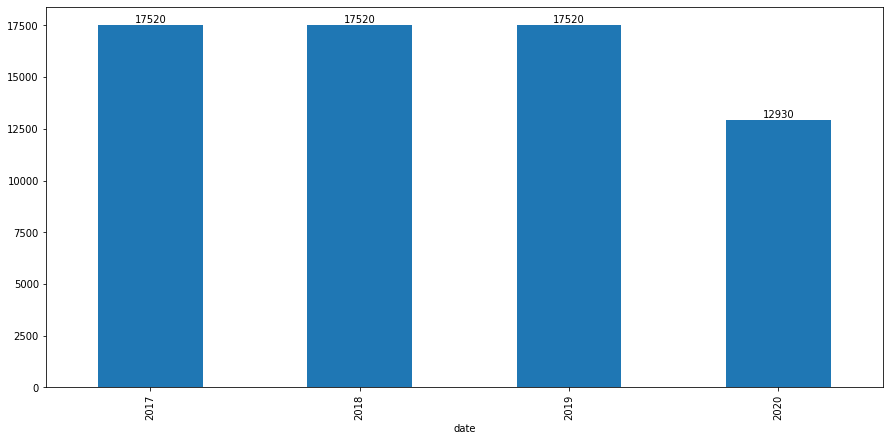

In [380]:
plt.figure(figsize=(15,7))
graph=ctab.groupby(ctab["date"].dt.year).row_id.count().plot(kind="bar")
for i in graph.containers:
    graph.bar_label(i,)

Text(0.5, 1.0, 'Numbers Sold Distribution')

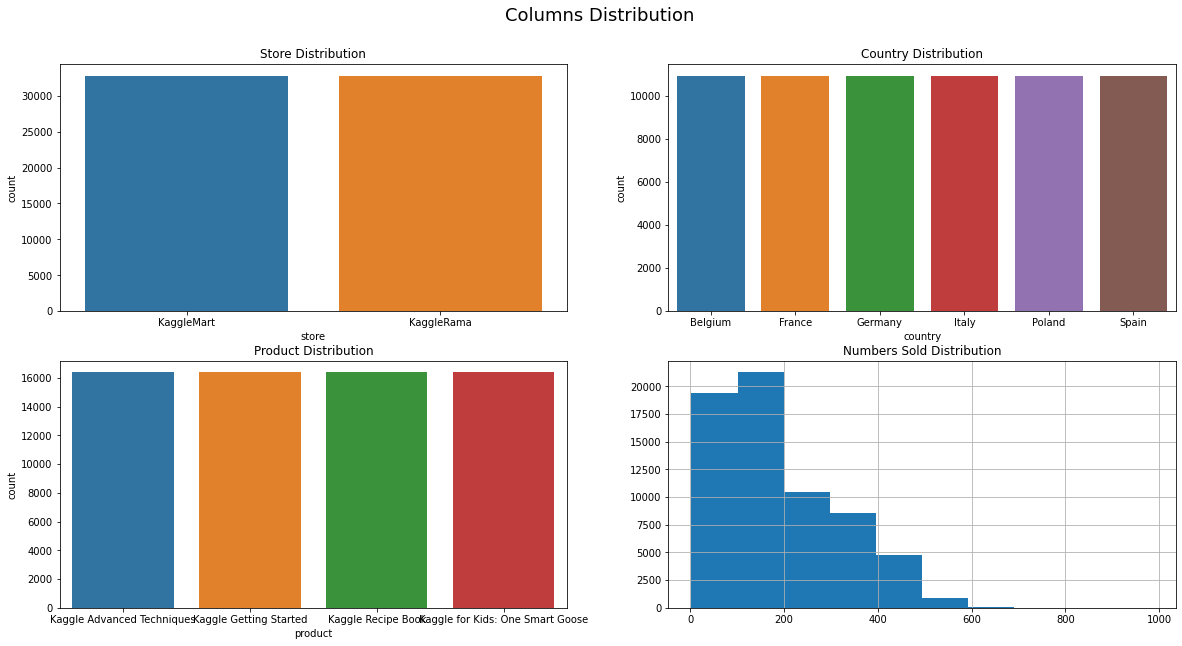

In [381]:
fig, axes = plt.subplots(2, 2,figsize=(20,10))
plt.text(x=0.5, y=0.94, s="Columns Distribution", fontsize=18, ha="center", transform=fig.transFigure)
sns.countplot(x=ctab['store'],ax=axes[0,0])
axes[0,0].set_title('Store Distribution')
sns.countplot(x=ctab['country'],ax=axes[0,1])
axes[0,1].set_title('Country Distribution')
sns.countplot(x=ctab['product'],ax=axes[1,0])
axes[1,0].set_title('Product Distribution')
ctab.num_sold.hist(ax=axes[1,1])
axes[1,1].set_title('Numbers Sold Distribution')

<AxesSubplot:xlabel='date'>

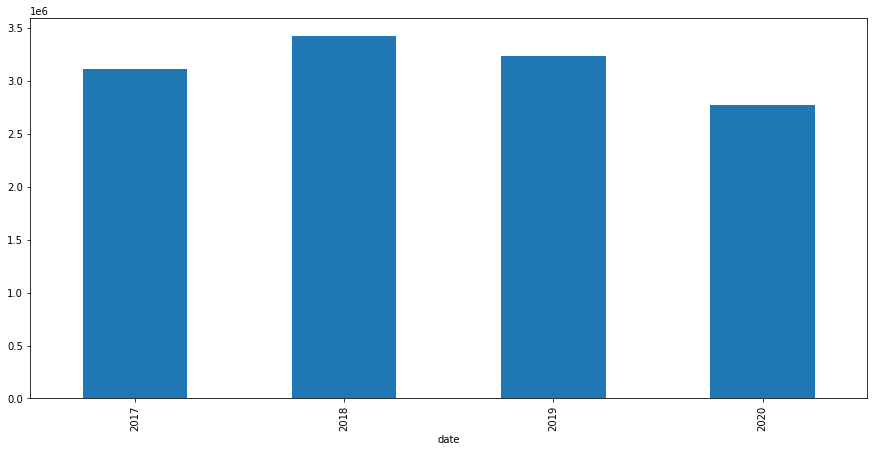

In [382]:
plt.figure(figsize=(15,7))
ctab.groupby(ctab["date"].dt.year).num_sold.sum().plot(kind='bar')

for each product sales year month weekends momken

Text(0.5, 1.0, 'Numbers Sold in Countries based on Store')

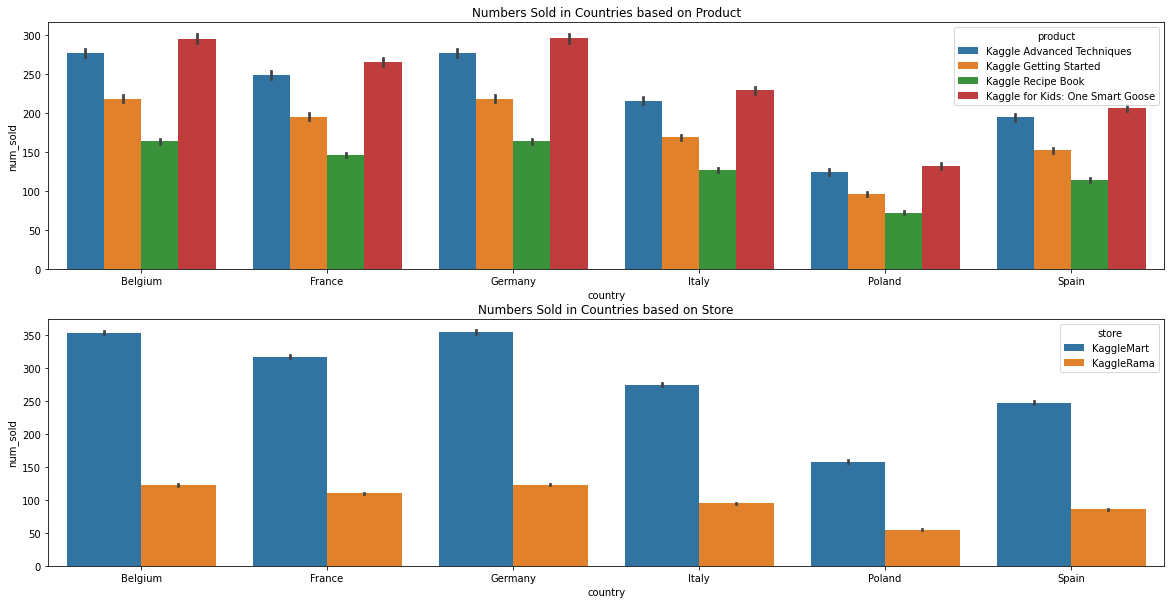

In [383]:
fig, axes = plt.subplots(2, 1,figsize=(20,10))
sns.barplot(ax=axes[0],data=ctab, x="country",y='num_sold',hue='product')
axes[0].set_title('Numbers Sold in Countries based on Product')
sns.barplot(ax=axes[1],data=ctab, x="country",y='num_sold',hue='store')
axes[1].set_title('Numbers Sold in Countries based on Store')


In [384]:
import datetime as dt

In [385]:
dayofweek=ctab["date"].apply(lambda m : m.strftime('%A'))
ctab['weekday']=dayofweek
ctab["Month"]=ctab["date"].dt.month_name()
ctab["Year"]=ctab["date"].dt.year

In [386]:
ctab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65490 entries, 0 to 65489
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    65490 non-null  int64         
 1   date      65490 non-null  datetime64[ns]
 2   country   65490 non-null  object        
 3   store     65490 non-null  object        
 4   product   65490 non-null  object        
 5   num_sold  65490 non-null  int64         
 6   weekday   65490 non-null  object        
 7   Month     65490 non-null  object        
 8   Year      65490 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 4.5+ MB


<AxesSubplot:title={'center':'Numbers Sold based on Year'}, xlabel='Year'>

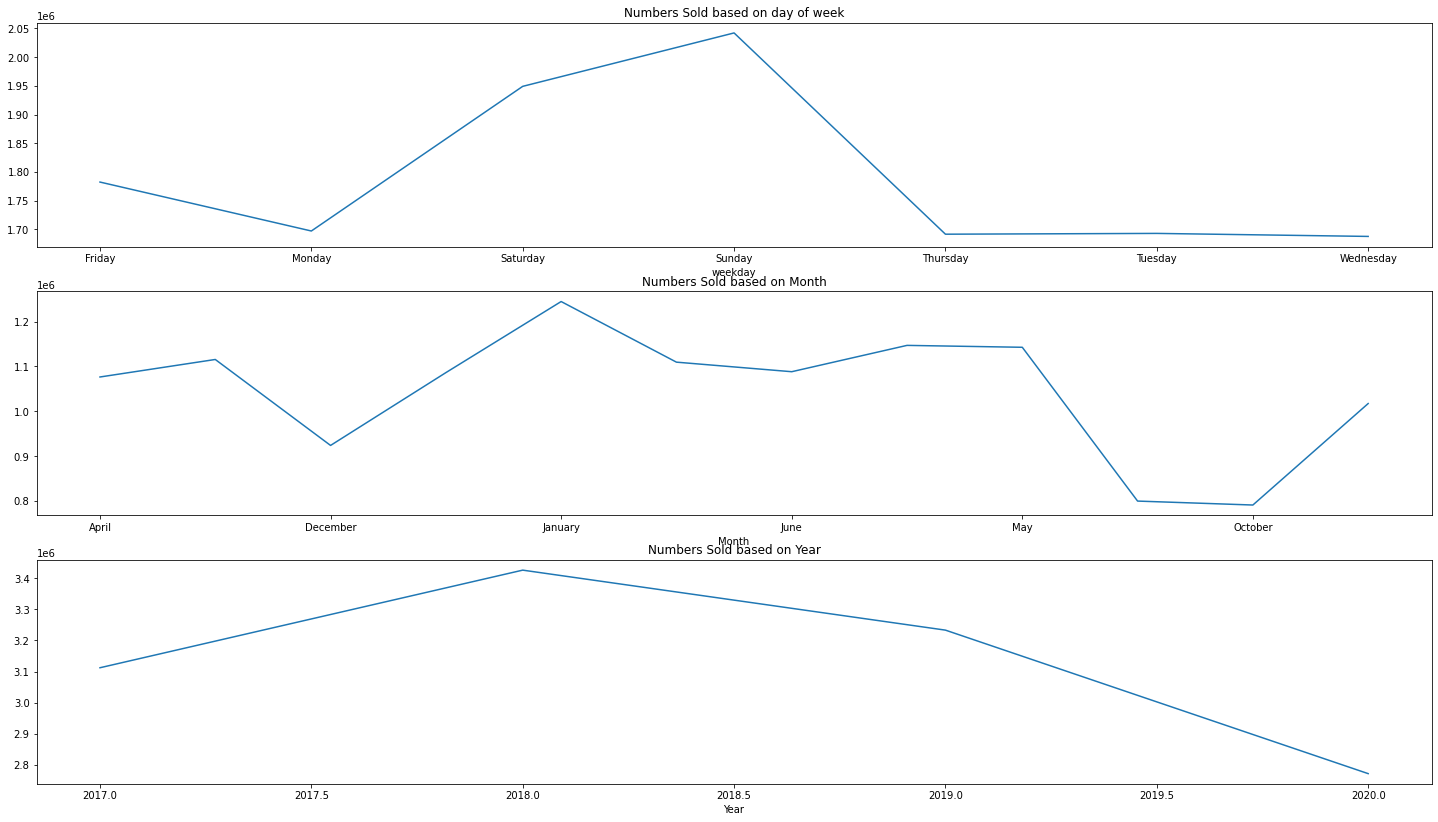

In [387]:
fig, axes = plt.subplots(3, 1,figsize=(25,14))
ctab.groupby('weekday').num_sold.sum().plot(title='Numbers Sold based on day of week',ax=axes[0])
ctab.groupby('Month').num_sold.sum().plot(title='Numbers Sold based on Month',ax=axes[1])
ctab.groupby('Year').num_sold.sum().plot(title='Numbers Sold based on Year',ax=axes[2])

In [388]:
ctab.groupby(['store','product']).num_sold.sum()

store       product                         
KaggleMart  Kaggle Advanced Techniques          2706576
            Kaggle Getting Started              2126233
            Kaggle Recipe Book                  1595955
            Kaggle for Kids: One Smart Goose    2884821
KaggleRama  Kaggle Advanced Techniques           938698
            Kaggle Getting Started               737194
            Kaggle Recipe Book                   552602
            Kaggle for Kids: One Smart Goose    1000704
Name: num_sold, dtype: int64

nedakhal el month w el year b priority le latest so l;abel encoding?

In [389]:
ctab_dummied=pd.get_dummies(ctab,drop_first=True)
X=ctab_dummied.drop(['row_id','num_sold','date'],axis=1)
y=ctab_dummied['num_sold']

In [390]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def smape(a, f):
  return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

def predictmodels(clf_A,clf_B,clf_C,X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  print("Training set has {} samples.".format(X_train.shape[0]))
  print("Testing set has {} samples.".format(X_test.shape[0]))
  print()
  results = {}
  df = pd.DataFrame()
  for clf in [clf_A, clf_B, clf_C]:
      clf_name = clf.__class__.__name__
      results[clf_name] = {}
      results[clf_name] = \
      clf = clf.fit(X_train, y_train)
      try:
        predictions_test = clf.predict(X_test)
      except:
        predictions_test = clf_A.predict(X_test)

      row={'SMAPE': smape(y_test,predictions_test)}
      rows=[smape(y_test,predictions_test)]
      d = {clf_name: row}
      if df.empty:
        df=pd.DataFrame(data=d)
      else:
        df[clf_name]=rows
  return df

In [391]:
predictmodels(LinearRegression(),linear_model.Lasso(random_state=3),PolynomialFeatures(),X,y)

Training set has 52392 samples.
Testing set has 13098 samples.



,LinearRegression,Lasso,PolynomialFeatures
SMAPE,31.680651,28.871508,31.680651


In [392]:
predictmodels(DecisionTreeRegressor(random_state=3),RandomForestRegressor(random_state=3),linear_model.BayesianRidge(),X,y)

Training set has 52392 samples.
Testing set has 13098 samples.



,DecisionTreeRegressor,RandomForestRegressor,BayesianRidge
SMAPE,7.418422,7.216796,31.674698


In [393]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV

In [396]:
def Gridsrch(clf,X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  parameters={'n_estimators':[80]}
  scorer=make_scorer(smape)
  grid_layout=RandomizedSearchCV(clf,parameters,scoring=scorer)

  grid_fit=grid_layout.fit(X_train,y_train)

  best_clf=grid_fit.best_estimator_

  #predict using plane and optimized model
  predictions=(clf.fit(X_train,y_train).predict(X_test))
  best_predictions=best_clf.predict(X_test)
  print(str(clf) +" before Optimization: " + str(smape(y_test,predictions)))
  print(str(clf) +" after Optimization: " + str(smape(y_test,best_predictions)))
  print(grid_fit.best_params_)
  return grid_fit

In [397]:
grid_fit=Gridsrch(RandomForestRegressor(random_state=3),X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomForestRegressor(random_state=3) before Optimization: 7.216795611754344
RandomForestRegressor(random_state=3) after Optimization: 7.219905694988372
{'n_estimators': 80}


Text(0.5, 0, 'Random Forest Feature Importance')

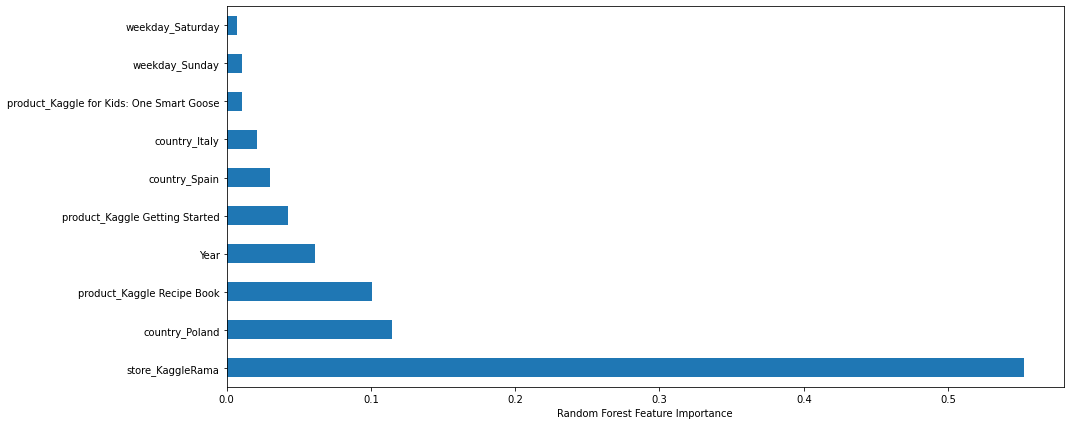

In [400]:
plt.figure(figsize=(15,7))
feat_importances = pd.Series(grid_fit.best_estimator_.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel("Random Forest Feature Importance")

In [401]:
test=pd.read_csv('test.csv')

In [402]:
test.shape

(17520, 5)

In [403]:
c_test=test.copy()
c_test=c_test.replace('Belg', 'Belgium')

In [404]:
c_test=c_test.dropna(axis=0)

In [405]:
c_test['date']=pd.to_datetime(c_test['date'], utc=False)
dayofweek=c_test["date"].apply(lambda m : m.strftime('%A'))
c_test['weekday']=dayofweek
c_test["Month"]=c_test["date"].dt.month_name()
c_test["Year"]=c_test["date"].dt.year

In [406]:
c_test=pd.get_dummies(c_test,drop_first=True)
X_pred=c_test.drop(['row_id','date'],axis=1)

In [407]:
X_pred.columns.difference(X.columns)

Index([], dtype='object')

In [409]:
fitted_model=grid_fit.best_estimator_.fit(X,y)

In [410]:
predictions=fitted_model.predict(X_pred)

In [411]:
res=pd.DataFrame(predictions.astype(int),columns=['num_sold']).reset_index()

In [412]:
res.insert(0, 'row_id', res['index'])
res=res.drop('index',axis=1)

In [413]:
res['row_id']=res['row_id']+70128


In [414]:
res.to_csv("submission.csv", index=False)